# Importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.animation as animation
from IPython.display import HTML

# Getting and Cleaning the Data

## Importing the data

In [2]:
df=pd.read_csv("ipl_matches.csv", usecols=[1,3,10])
df.dropna(inplace=True)

## Renaming and getting the abbreviations

In [3]:
df.replace({"Delhi Daredevils":"Delhi Capitals","Rising Pune Supergiant":"Rising Pune Supergiants"}, inplace=True)
d={}; di={}
for s in df["winner"].unique():
    d[s]="".join([i[0] for i in s.split()])
d["Sunrisers Hyderabad"]="SRH"; d["Kings XI Punjab"]="KXIP"; d["Deccan Chargers"]="DCH" #Changing the exceptions
for i in d:
    di[d[i]]=i
df["winner"]=df["winner"].apply(lambda x: d[x])

## Colors

In [4]:
colors=dict(zip(d.values(), ["orangered", "#d11d9b", "#2e0854", "darkgrey", "#ec1c24", "#0e74e8", "deeppink", "#e04f16", "#e3c612", "#004ba0", "#d9e3ef", "#c0d6eb", "#ec1c24","#632b72"]))

## Converting to DateTime

#### Pandas to Datetime is not useful as the dates are in different formats which getsrecognized incorrectly.

In [5]:
def datetimeconverter(s):
    if "-" in s:
        return datetime.datetime.strptime(s,"%Y-%m-%d")
    return datetime.datetime.strptime(s, "%d/%m/%y")

df["date"]=df["date"].apply(datetimeconverter)
df.sort_values("date", inplace = True)

## Creating Data for Each Season

In [6]:
df_season=df.set_index("season")

In [7]:
def get_df_for_season(year):
    s=df_season.loc[str(year)]["winner"].value_counts(); dic={}
    return s[::-1]
    for i in d.values():  #Set the values of teams not present as 0
        if i not in s.index:
            dic[i]=0
    return s.append(pd.Series(dic))[::-1]       

## Plotting this Data

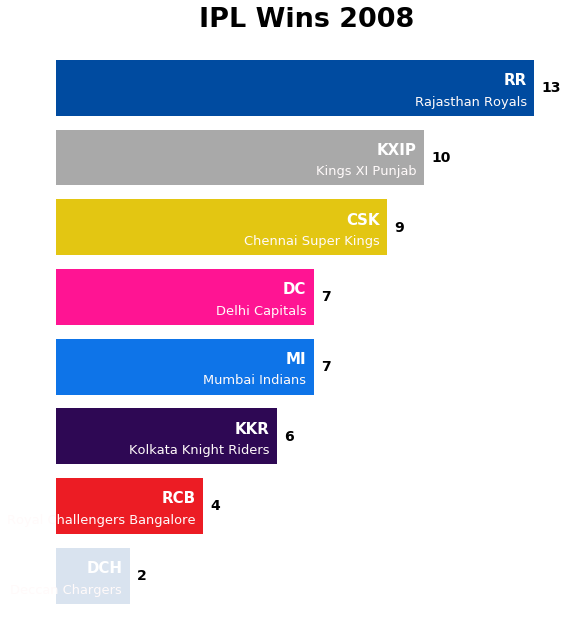

In [8]:
def plotting(year):
    x=get_df_for_season(year)
    plt.cla()
    plt.barh(x.index, x.values, color=[colors[i] for i in x.index])
    plt.box(False)
    plt.xticks([]); plt.yticks([])
    for i in range(len(x.index)):
        plt.text(x.values[i]-0.2, i, x.index[i], ha="right", size=15, weight=900, va="bottom", color="white")
        plt.text(x.values[i]+0.2, i, x.values[i], ha="left", size=14, weight=800, va="center")
        plt.text(x.values[i]-0.2, i-0.25, di[x.index[i]], ha="right", size=13, weight=350, va="baseline", color="snow")
    plt.title(f"IPL Wins {year}", size=27, weight=600);

fig=plt.figure(figsize=(9,11))
animator = animation.FuncAnimation(fig, plotting, frames=range(2008, 2020), interval=800)
HTML(animator.to_jshtml())